In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings
import graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import pydotplus     # Anaconda Prompt에서 pip install pydotplus 라고 치면 pydotplus가 설치된다.
import os

warnings.filterwarnings(action='ignore')

In [2]:
care_data = pd.read_csv('/home/salmon10/care/uplc_total.csv')
care_data

,Ala,Arg,Asn,Asp,Cit,Gln,Glu,Gly,His,Ile,...,Met.SO,Putrescine,Sarcosine,SDMA,Serotonin,Spermidine,Spermine,t4.OH.Pro,Taurine,Response
0,8.519893,6.753963,5.546327,2.235380,4.897510,9.681620,5.496552,8.071277,6.763176,6.109229,...,-0.070140,-2.886585,1.678481,-1.242249,-3.815743,-2.065846,-2.504305,3.720203,6.508506,Non-Response
1,8.280480,6.164330,5.335301,2.177542,4.939649,9.487851,6.312748,8.367157,6.568834,6.345283,...,-0.256796,-2.937211,1.723910,-0.954223,-1.964425,-2.391469,-2.627161,3.686913,6.061656,Non-Response
2,8.525146,6.192383,5.917820,2.975011,5.242468,9.331789,6.778979,7.411551,5.962385,6.350807,...,-1.320927,-3.467726,1.829843,-1.039953,-4.822406,-2.473931,-2.627161,2.969209,7.055013,Non-Response
3,8.236978,7.019727,6.114128,2.204867,5.771206,9.663169,6.394499,7.839645,6.849032,7.216058,...,0.249389,-3.052689,2.373069,-0.700467,-4.822406,-2.561394,-2.627161,3.841241,6.554638,Non-Response
4,8.403516,5.621580,5.904758,1.778135,3.850763,9.524607,4.242847,8.102533,6.526353,5.694720,...,0.005461,-3.972315,1.035039,-1.162565,-2.090602,-2.721859,-2.854248,3.334752,5.486608,Non-Response
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,7.876223,5.801515,4.300248,1.925926,3.497889,8.667454,6.262897,6.745388,5.784769,4.715284,...,-1.193257,-2.718270,1.857465,-1.610941,-4.512066,-2.625934,-2.680154,3.164133,8.499872,Response
574,8.454583,6.456787,5.541558,2.248758,5.025136,9.614589,6.439617,7.745388,6.669511,6.432416,...,-0.792719,-2.055305,2.146584,-0.996232,-3.927104,-2.403542,-2.680154,3.581598,6.477244,Response
575,9.220377,7.513125,6.329355,2.932694,5.217781,9.928697,6.236084,8.442825,7.140583,7.524918,...,0.813939,-2.843800,2.433866,-1.025979,-6.058894,-2.795859,-2.762617,4.675465,5.429150,Response
576,9.180921,6.752952,5.538237,1.817966,4.587015,9.445360,6.434184,7.705859,6.440916,6.897577,...,-0.570326,-2.396341,2.157026,-1.325539,-6.058894,-2.095420,-2.602152,4.544761,5.202676,Non-Response


In [3]:
care_data.Response = care_data.Response.replace(['Response','Non-Response'], [0,1])
care_data

,Ala,Arg,Asn,Asp,Cit,Gln,Glu,Gly,His,Ile,...,Met.SO,Putrescine,Sarcosine,SDMA,Serotonin,Spermidine,Spermine,t4.OH.Pro,Taurine,Response
0,8.519893,6.753963,5.546327,2.235380,4.897510,9.681620,5.496552,8.071277,6.763176,6.109229,...,-0.070140,-2.886585,1.678481,-1.242249,-3.815743,-2.065846,-2.504305,3.720203,6.508506,1
1,8.280480,6.164330,5.335301,2.177542,4.939649,9.487851,6.312748,8.367157,6.568834,6.345283,...,-0.256796,-2.937211,1.723910,-0.954223,-1.964425,-2.391469,-2.627161,3.686913,6.061656,1
2,8.525146,6.192383,5.917820,2.975011,5.242468,9.331789,6.778979,7.411551,5.962385,6.350807,...,-1.320927,-3.467726,1.829843,-1.039953,-4.822406,-2.473931,-2.627161,2.969209,7.055013,1
3,8.236978,7.019727,6.114128,2.204867,5.771206,9.663169,6.394499,7.839645,6.849032,7.216058,...,0.249389,-3.052689,2.373069,-0.700467,-4.822406,-2.561394,-2.627161,3.841241,6.554638,1
4,8.403516,5.621580,5.904758,1.778135,3.850763,9.524607,4.242847,8.102533,6.526353,5.694720,...,0.005461,-3.972315,1.035039,-1.162565,-2.090602,-2.721859,-2.854248,3.334752,5.486608,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,7.876223,5.801515,4.300248,1.925926,3.497889,8.667454,6.262897,6.745388,5.784769,4.715284,...,-1.193257,-2.718270,1.857465,-1.610941,-4.512066,-2.625934,-2.680154,3.164133,8.499872,0
574,8.454583,6.456787,5.541558,2.248758,5.025136,9.614589,6.439617,7.745388,6.669511,6.432416,...,-0.792719,-2.055305,2.146584,-0.996232,-3.927104,-2.403542,-2.680154,3.581598,6.477244,0
575,9.220377,7.513125,6.329355,2.932694,5.217781,9.928697,6.236084,8.442825,7.140583,7.524918,...,0.813939,-2.843800,2.433866,-1.025979,-6.058894,-2.795859,-2.762617,4.675465,5.429150,0
576,9.180921,6.752952,5.538237,1.817966,4.587015,9.445360,6.434184,7.705859,6.440916,6.897577,...,-0.570326,-2.396341,2.157026,-1.325539,-6.058894,-2.095420,-2.602152,4.544761,5.202676,1


In [4]:
X = np.array(pd.DataFrame(care_data,
                          columns= ['Ala', 'Arg', 'Asn', 'Asp', 'Cit', 'Gln', 'Glu', 'Gly', 'His', 'Ile',
                                   'Lys', 'Met', 'Orn', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 'Tyr', 'Val',
                                   'ADMA', 'alpha.AAA', 'Creatinine', 'Kynurenine', 'Met.SO', 'Putrescine',
                                   'Sarcosine', 'SDMA', 'Serotonin', 'Spermidine', 'Spermine', 't4.OH.Pro',
                                   'Taurine']))
y = np.array(pd.DataFrame(care_data, columns=["Response"]))

train/test accuracies 0.781/0.628


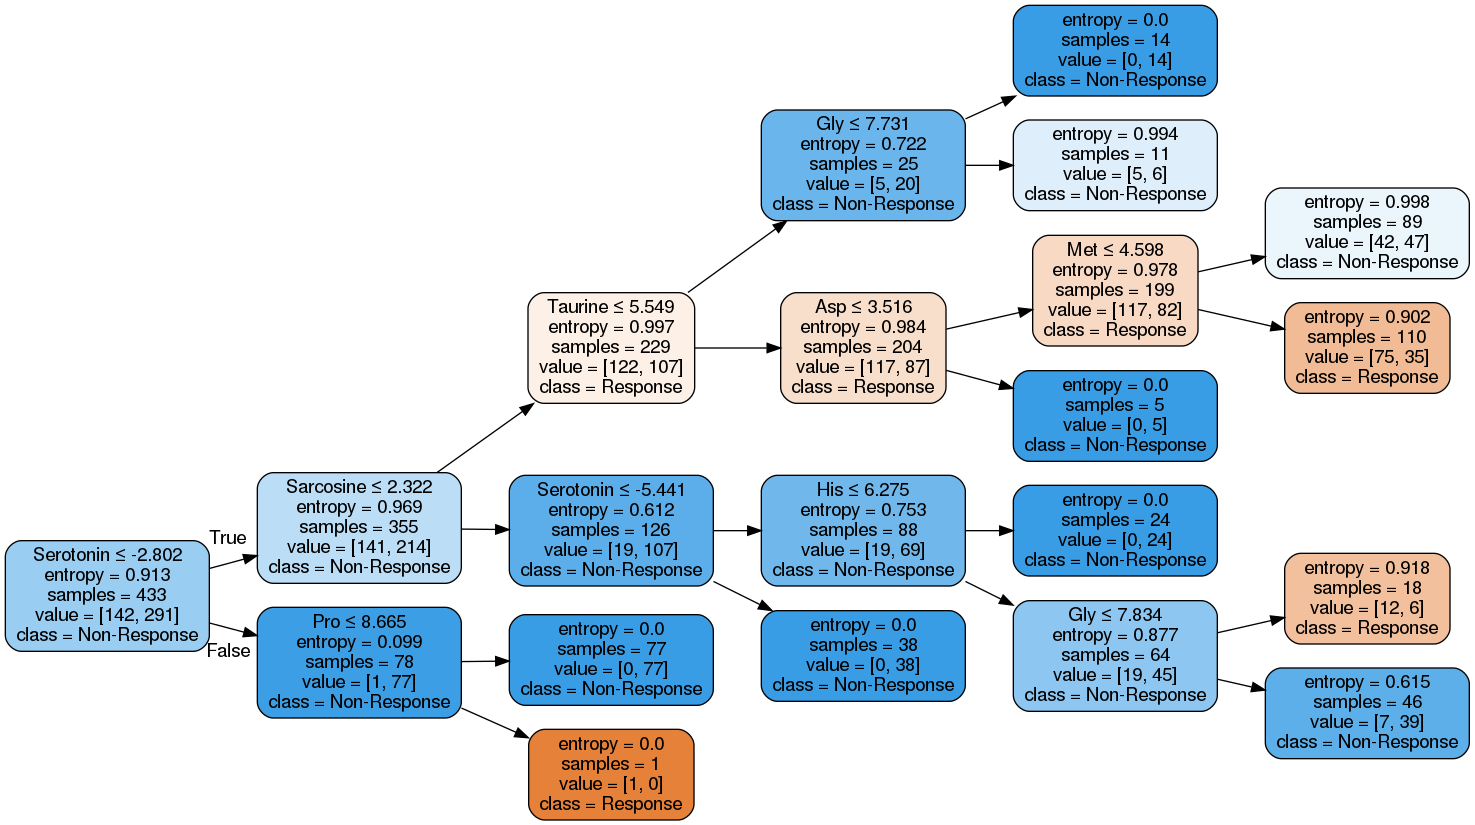

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75)
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth = 5,
                                random_state = 10, min_samples_split = 15)
dt_clf = dt_clf.fit(X_train, y_train)
dt_prediction = dt_clf.predict(X_test)

y_train_pred = dt_clf.predict(X_train)
y_test_pred = dt_clf.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('train/test accuracies %.3f/%.3f' % (tree_train, tree_test))


feature_names = care_data.columns.tolist()
feature_names = feature_names[0:33]
target_name = np.array(['Response','Non-Response'])

dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True,
                                  rotate= True)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75)
est = 100;
max = 2;
plot_train = []
plot_test = []
for i in range(20):
    dt_clf = RandomForestClassifier(n_estimators= est, criterion='entropy', max_depth = max,
                                random_state = 100, min_samples_split = 10)
    dt_clf = dt_clf.fit(X_train, y_train)
    dt_prediction = dt_clf.predict(X_test)
    y_train_pred = dt_clf.predict(X_train)
    y_test_pred = dt_clf.predict(X_test)
    tree_train = accuracy_score(y_train, y_train_pred)
    tree_test = accuracy_score(y_test, y_test_pred)
    print('max_depth = %d train/test accuracies %.3f/%.3f' % (max, tree_train, tree_test))
    plot_train.append(tree_train)
    plot_test.append(tree_test)
    max = max+1


max_depth = 2 train/test accuracies 0.677/0.655
max_depth = 3 train/test accuracies 0.688/0.648
max_depth = 4 train/test accuracies 0.723/0.669
max_depth = 5 train/test accuracies 0.811/0.669
max_depth = 6 train/test accuracies 0.889/0.676
max_depth = 7 train/test accuracies 0.945/0.683
max_depth = 8 train/test accuracies 0.968/0.690
max_depth = 9 train/test accuracies 0.984/0.683
max_depth = 10 train/test accuracies 0.993/0.669
max_depth = 11 train/test accuracies 0.998/0.669
max_depth = 12 train/test accuracies 0.995/0.683
max_depth = 13 train/test accuracies 0.993/0.690
max_depth = 14 train/test accuracies 0.995/0.669
max_depth = 15 train/test accuracies 0.998/0.676
max_depth = 16 train/test accuracies 0.998/0.676
max_depth = 17 train/test accuracies 0.995/0.676
max_depth = 18 train/test accuracies 0.995/0.676
max_depth = 19 train/test accuracies 0.995/0.676
max_depth = 20 train/test accuracies 0.995/0.676
max_depth = 21 train/test accuracies 0.995/0.676


<function matplotlib.pyplot.show(*args, **kw)>

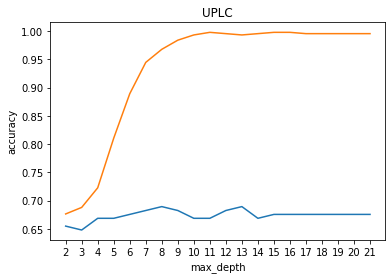

In [9]:
a = np.array(np.arange(2,22,1))
plt.plot(a, plot_test)
plt.plot(a, plot_train)
plt.ylabel("accuracy")
plt.xlabel("max_depth")
plt.title("UPLC")
plt.xticks(a)
plt.show